In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# model selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# import stats model
import statsmodels.api as sm

# time series models
from statsmodels.tsa.arima.model import ARIMA

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Libraries for Saving the Model
from pickle import dump
from pickle import load

# Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the data for 2004-2019
# EUR/USD, CNY/USD, SP500, NASDAQ 100, and VIX data are from Yahoo Finance
aa19 = pd.read_csv('crsp_04_19.csv', parse_dates = [1], index_col = [1]) # AAPL
am19 = pd.read_csv('AMZN_04_19.csv', parse_dates = [1], index_col = [1]) # AMZN
ms19 = pd.read_csv('MSFT_04_19.csv', parse_dates = [1], index_col = [1]) # MSFT
eud19 = pd.read_csv('EUR_USD_04_19.csv', parse_dates = [0], index_col = [0]) # EUR/USD
cnd19 = pd.read_csv('CNY_USD_04_19.csv', parse_dates = [0], index_col = [0]) # CNY/USD
sp19 = pd.read_csv('SP500_04_19.csv', parse_dates = [0], index_col = [0]) # SP500
nas19 = pd.read_csv('nasdaq_04_19.csv', parse_dates = [0], index_col = [0]) # Nasdaq 100
vix19 = pd.read_csv('VIX_04_19.csv', parse_dates = [0], index_col = [0]) # VIX
fun19 = pd.read_csv('cstat_04_19.csv', parse_dates = [2], index_col = [2]) # fundamental data of Apple from Compustat

# read in the data for 2004-2022
aa22 = pd.read_csv('crsp_04_22.csv', parse_dates = [1], index_col = [1])
am22 = pd.read_csv('AMZN_04_22.csv', parse_dates = [1], index_col = [1])
ms22 = pd.read_csv('MSFT_04_22.csv', parse_dates = [1], index_col = [1])
eud22 = pd.read_csv('EUR_USD_04_22.csv', parse_dates = [0], index_col = [0])
cnd22 = pd.read_csv('CNY_USD_04_22.csv', parse_dates = [0], index_col = [0])
sp22 = pd.read_csv('SP500_04_22.csv', parse_dates = [0], index_col = [0])
nas22 = pd.read_csv('nasdaq_04_22.csv', parse_dates = [0], index_col = [0])
vix22 = pd.read_csv('VIX_04_22.csv', parse_dates = [0], index_col = [0])
fun22 = pd.read_csv('cstat_04_22.csv', parse_dates = [2], index_col = [2])


In [3]:
'2018-09-30' in nas19.index
# we find data for Sept 30 of 2006, 2007, 2012, 2017, 2018 are missing

False

In [4]:
# change those years' last trading day's data to the calendar month-end
# List of specific dates to change
dates_to_change = [pd.Timestamp('2006-09-29'), pd.Timestamp('2007-09-28'), pd.Timestamp('2012-09-28'), pd.Timestamp('2017-09-29'), pd.Timestamp('2018-09-28')]

# Change specified indices to month-end
aa19.index = aa19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
am19.index = am19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
ms19.index = ms19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
eud19.index = eud19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
cnd19.index = cnd19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
sp19.index = sp19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
nas19.index = nas19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
vix19.index = vix19.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)

aa22.index = aa22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
am22.index = am22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
ms22.index = ms22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
eud22.index = eud22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
cnd22.index = cnd22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
sp22.index = sp22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
nas22.index = nas22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
vix22.index = vix22.index.map(lambda x: x.to_period('M').to_timestamp('M') if x in dates_to_change else x)
# now the data from fisical year end also exists in the stock database
# I ignored the last trading days of those years and simply push them to the calendar month-end, it won't influence much 
# Year 2019, 2020, 2021 don't have such problem

In [5]:
# df prep
aa19.drop(columns = ['PERMNO', 'TICKER', 'PERMCO', 'NSDINX', 'PRC', 'VOL', 'SHROUT'], inplace = True)
aa19.rename(columns = {'RET': 'aaret'}, inplace = True)

am19= am19[['RET']]
am19.rename(columns={'RET': 'amret'}, inplace = True)

ms19= ms19[['RET']]
ms19.rename(columns={'RET': 'msret'}, inplace = True)

eud19 = eud19[['Close']]
eud19.rename(columns={'Close': 'eud'}, inplace = True)

cnd19 = cnd19[['Close']]
cnd19.rename(columns={'Close': 'cnd'}, inplace = True)

sp19 = sp19[['Adj Close']]
sp19.rename(columns = {'Adj Close': 'sp'}, inplace = True)

nas19 = nas19[['Adj Close']]
nas19.rename(columns = {'Adj Close': 'nas'}, inplace = True)

vix19 = vix19[['Close']]
vix19.rename(columns = {'Close': 'vix'}, inplace = True)

fun19 = fun19[['act','dlc','dltt','ebit','epsfx','lct','ni','seq']]
# lpermno: linked variable with crsp database
# act: current asset total
# dlc: debt in current liabilities
# dltt: long-term debt
# epsfx: diluted EPS excluding extraordinary items
# lct: current liabilities total
# ni: net income
# seq: total equity

aa22.drop(columns = ['PERMNO', 'TICKER', 'PERMCO', 'PRC', 'VOL', 'SHROUT'], inplace = True)
aa22.rename(columns = {'RET': 'aaret'}, inplace = True)

am22 = am22[['RET']]
am22.rename(columns={'RET': 'amret'}, inplace = True)

ms22= ms22[['RET']]
ms22.rename(columns={'RET': 'msret'}, inplace = True)

eud22 = eud22[['Close']]
eud22.rename(columns={'Close': 'eud'}, inplace = True)

cnd22 = cnd22[['Close']]
cnd22.rename(columns={'Close': 'cnd'}, inplace = True)

sp22 = sp22[['Adj Close']]
sp22.rename(columns = {'Adj Close': 'sp'}, inplace = True)

nas22 = nas22[['Adj Close']]
nas22.rename(columns = {'Adj Close': 'nas'}, inplace = True)

vix22 = vix22[['Close']]
vix22.rename(columns = {'Close': 'vix'}, inplace = True)

fun22 = fun22[['act','dlc','dltt','ebit','epsfx','lct','ni','seq']]

In [6]:
aa19['aaret'] = aa19['aaret'].fillna(0)
am19['amret'] = am19['amret'].fillna(0)
ms19['msret'] = ms19['msret'].fillna(0)
sp19['sp'] = sp19['sp'].fillna(0)
nas19['nas'] = nas19['nas'].fillna(0)
vix19['vix'] = vix19['vix'].fillna(0)

aa22['aaret'] = aa22['aaret'].fillna(0)
am22['amret'] = am22['amret'].fillna(0)
ms22['msret'] = ms22['msret'].fillna(0)
sp22['sp'] = sp22['sp'].fillna(0)
nas22['nas'] = nas22['nas'].fillna(0)
vix22['vix'] = vix22['vix'].fillna(0)

In [7]:
aa19['ma'] = aa19['aaret'].rolling(window = 200).mean()
aa22['ma'] = aa22['aaret'].rolling(window = 200).mean()


In [8]:
aa19['ma']

date
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
2004-01-08         NaN
                ...   
2018-12-24   -0.000802
2018-12-26   -0.000498
2018-12-27   -0.000482
2018-12-28   -0.000437
2018-12-31   -0.000395
Name: ma, Length: 3775, dtype: float64

In [9]:
aa19

,aaret,ma
date,,
2004-01-02,-0.004212,NaN
2004-01-05,0.041823,NaN
2004-01-06,-0.003608,NaN
2004-01-07,0.022635,NaN
2004-01-08,0.034086,NaN
...,...,...
2018-12-24,-0.025874,-0.000802
2018-12-26,0.070422,-0.000498
2018-12-27,-0.006490,-0.000482


In [10]:
# merge the data into one dataframe
aa19 = pd.concat([aa19, am19, ms19, eud19, cnd19, sp19, nas19, vix19, fun19], axis=1)
aa22 = pd.concat([aa22, am22, ms22, eud22, cnd22, sp22, nas22, vix22, fun22], axis=1)
# till now, data is mostly cleaned

In [11]:
# compute the ratios from fundamental data
aa19['d/e'] = (aa19['dltt'] + aa19['dlc']) / aa19['seq']
aa19['roe'] = aa19['ni'] / aa19['seq']
aa19['crt'] = aa19['act'] / aa19['lct'] # current ratio
# EPS ratio = epsfx
# compute the 200-day moving average based on return

aa22['d/e'] = (aa22['dltt'] + aa22['dlc']) / aa22['seq']
aa22['roe'] = aa22['ni'] / aa22['seq']
aa22['crt'] = aa22['act'] / aa22['lct']

In [12]:
# to avoid look-ahead bias, I lag the ratios(fundamental data) to 6 months
aa19['lag de'] = aa19['d/e'].shift(123)
aa19['lag roe'] = aa19['roe'].shift(123)
aa19['lag crt'] = aa19['crt'].shift(123)
aa19['lag eps'] = aa19['epsfx'].shift(123)
# each month has 20-21 trading days, so 6 months has 120-126 trading days, so in average we can lag 123 days for 6 months.

aa22['lag de'] = aa22['d/e'].shift(123)
aa22['lag roe'] = aa22['roe'].shift(123)
aa22['lag crt'] = aa22['crt'].shift(123)
aa22['lag eps'] = aa22['epsfx'].shift(123)

In [13]:
# make the dataset clean
aa19.drop(columns= ['act','dlc','dltt','ebit','epsfx','lct','ni','seq','d/e','roe','crt'], inplace = True)
aa22.drop(columns= ['act','dlc','dltt','ebit','epsfx','lct','ni','seq','d/e','roe','crt'], inplace = True)

In [14]:
aa19.loc['2018-03-01':'2018-04-01']
# check the data again

,aaret,ma,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps
2018-03-01,-0.017516,0.000729,-0.012562,-0.009811,1.219126,0.157955,2677.669922,6750.540039,22.469999,NaN,NaN,NaN,NaN
2018-03-02,0.006914,0.000771,0.004553,0.002154,1.227084,0.157297,2691.250000,6811.040039,19.590000,NaN,NaN,NaN,NaN
2018-03-05,0.003462,0.000956,0.015571,0.006341,1.231542,0.157473,2720.939941,6881.279785,18.730000,NaN,NaN,NaN,NaN
2018-03-06,-0.000848,0.000875,0.009208,-0.003417,1.233654,0.157508,2728.120117,6913.020020,18.360001,NaN,NaN,NaN,NaN
2018-03-07,-0.009283,0.000812,0.004787,0.005787,1.241665,0.158494,2726.800049,6929.390137,17.760000,NaN,NaN,NaN,NaN
2018-03-08,0.010912,0.000836,0.004440,0.006073,1.241465,0.158103,2738.969971,6966.430176,16.540001,NaN,NaN,NaN,NaN
2018-03-09,0.017181,0.000928,0.017418,0.022345,1.230663,0.157689,2786.570068,7101.180176,14.640000,NaN,NaN,NaN,NaN
2018-03-12,0.009668,0.000991,0.012350,0.002382,1.230875,0.158015,2783.020020,7131.120117,15.780000,NaN,NaN,NaN,NaN
2018-03-13,-0.009630,0.000926,-0.006388,-0.024388,1.233958,0.158000,2765.310059,7046.509766,16.350000,NaN,NaN,NaN,NaN
2018-03-14,-0.008501,0.000892,0.001776,-0.005932,1.239234,0.158218,2749.479980,7040.979980,17.230000,NaN,NaN,NaN,NaN


In [15]:
# transform the annual fundamental data to daily to fill the na
# forward fill:  forward fill (or carry forward) the annual data to each trading day until new annual data is available. 
# This method assumes that the most recently available annual data is the best estimate for each day until it's updated.
aa19['lag de'] = aa19['lag de'].interpolate(method='linear')
aa19['lag crt'] = aa19['lag crt'].interpolate(method='linear')
aa19['lag roe'] = aa19['lag roe'].interpolate(method='linear')
aa19['lag eps'] = aa19['lag eps'].interpolate(method='linear')

aa22['lag de'] = aa22['lag de'].interpolate(method='linear')
aa22['lag crt'] = aa22['lag crt'].interpolate(method='linear')
aa22['lag roe'] = aa22['lag roe'].interpolate(method='linear')
aa22['lag eps'] = aa22['lag eps'].interpolate(method='linear')
## till now, the data is clean enough to go

In [16]:
# create the X and Y for predicting models, using the logarithmic difference
# Y: apple's stock returns in the future
# X: all other predictors. When using ARIMA time series model, X should only be the historical data of apple itself.
aaret_prd = aa19['aaret'].shift(-1) # next day's return

# combine all features
X = pd.concat([
    aa19['aaret'].shift(1),
    aa19['amret'].shift(1),
    aa19['msret'].shift(1),
    aa19['eud'].shift(1),
    aa19['cnd'].shift(1),
    aa19['sp'].shift(1),
    aa19['nas'].shift(1),
    aa19['vix'].shift(1),
    aa19['lag de'].shift(1),
    aa19['lag roe'].shift(1),
    aa19['lag crt'].shift(1),
    aa19['lag eps'].shift(1),
    aa19['ma'].shift(1),
], axis = 1)

# create target variable
Y = aaret_prd

# Drop any rows with NaN values that result from shifting and rolling operations
dataset = pd.concat([Y, X], axis=1).dropna()

In [17]:
aaret_prd.loc['2005-03-23']

-0.001175

In [18]:
aaret_prd.loc['2005-03-23']
# we figured out the first column is the 'future' apple return

# rename the first column 'aaret' to 'aaret_prd' to clarify since we found it's the future return column
# Convert DataFrame columns to a list
column_names = dataset.columns.tolist()

# Rename the first column - index 0
column_names[0] = 'aaret_prd'

# Reassign the modified list back to the DataFrame columns
dataset.columns = column_names

In [19]:
# Separate the dataset back into X and Y
Y = dataset['aaret_prd']
X = dataset.drop('aaret_prd', axis=1)

In [20]:
dataset

,aaret_prd,aaret,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps,ma
2005-03-23,-0.001175,-0.019908,-0.015444,-0.008678,1.307702,0.120970,1171.709961,1465.089966,14.270000,0.000000,0.054374,2.632463,0.710000,0.005808
2005-03-25,0.000706,-0.001175,-0.009042,0.004136,1.293193,0.120970,1171.420044,1469.939941,13.420000,0.000000,0.055327,2.634945,0.716513,0.005500
2005-03-29,0.025150,0.000706,0.015511,-0.003295,1.289507,0.120825,1174.280029,1472.709961,13.750000,0.000000,0.056281,2.637427,0.723027,0.005528
2005-03-30,-0.026402,-0.018340,0.001198,-0.011570,1.293795,0.120970,1165.359985,1464.339966,14.490000,0.000000,0.056757,2.638668,0.726284,0.005347
2005-03-31,-0.018718,0.025150,0.026623,0.010033,1.291506,0.120970,1181.410034,1491.739990,13.640000,0.000000,0.057234,2.639909,0.729540,0.005573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,-0.038896,-0.031192,-0.036352,-0.002693,1.137540,0.145049,2506.959961,6342.970215,25.580000,0.862981,0.360702,1.276063,9.210000,-0.000258
2018-12-21,-0.025874,-0.025235,-0.022908,-0.021024,1.138952,0.145117,2467.419922,6243.189941,28.379999,0.862981,0.360702,1.276063,9.210000,-0.000337
2018-12-25,0.070422,-0.025874,-0.024313,-0.041739,1.137281,0.144814,2351.100098,5899.350098,36.070000,0.862981,0.360702,1.276063,9.210000,-0.000802
2018-12-27,0.000512,0.070422,0.094452,0.068310,1.141553,0.144963,2467.699951,6262.770020,30.410000,0.862981,0.360702,1.276063,9.210000,-0.000498


explore the dataset

In [21]:
dataset.describe()

,aaret_prd,aaret,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps,ma
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,0.001181,0.001145,0.001330,0.000603,1.279251,0.148066,1641.923812,3164.775011,18.706064,0.202407,0.293404,1.888350,13.453210,0.001409
std,0.020534,0.020641,0.025015,0.016781,0.122328,0.012432,529.618109,1691.306955,9.155022,0.299869,0.082760,0.592969,12.647930,0.001526
min,-0.179195,-0.179195,-0.218220,-0.117131,1.039047,0.120824,676.530029,1036.510010,9.140000,0.000000,0.054374,1.080113,0.710000,-0.003494
25%,-0.008546,-0.008501,-0.009724,-0.007039,1.179523,0.144678,1251.540039,1794.819946,12.870000,0.000000,0.234529,1.310778,4.661374,0.000671
50%,0.000901,0.000893,0.000504,0.000347,1.288693,0.149779,1440.699951,2529.169922,15.900000,0.000000,0.312913,1.669466,8.798077,0.001513
75%,0.011385,0.011419,0.012433,0.008209,1.361507,0.158158,2055.469971,4367.330078,21.490000,0.395256,0.357628,2.435579,18.030460,0.002368
max,0.139050,0.139050,0.269497,0.186047,1.598798,0.170561,2930.750000,7660.180176,80.860001,0.862981,0.447355,2.956372,44.150000,0.005808


In [22]:
dataset.head()

,aaret_prd,aaret,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps,ma
2005-03-23,-0.001175,-0.019908,-0.015444,-0.008678,1.307702,0.120970,1171.709961,1465.089966,14.27,0.0,0.054374,2.632463,0.710000,0.005808
2005-03-25,0.000706,-0.001175,-0.009042,0.004136,1.293193,0.120970,1171.420044,1469.939941,13.42,0.0,0.055327,2.634945,0.716513,0.005500
2005-03-29,0.025150,0.000706,0.015511,-0.003295,1.289507,0.120825,1174.280029,1472.709961,13.75,0.0,0.056281,2.637427,0.723027,0.005528
2005-03-30,-0.026402,-0.018340,0.001198,-0.011570,1.293795,0.120970,1165.359985,1464.339966,14.49,0.0,0.056757,2.638668,0.726284,0.005347
2005-03-31,-0.018718,0.025150,0.026623,0.010033,1.291506,0.120970,1181.410034,1491.739990,13.64,0.0,0.057234,2.639909,0.729540,0.005573


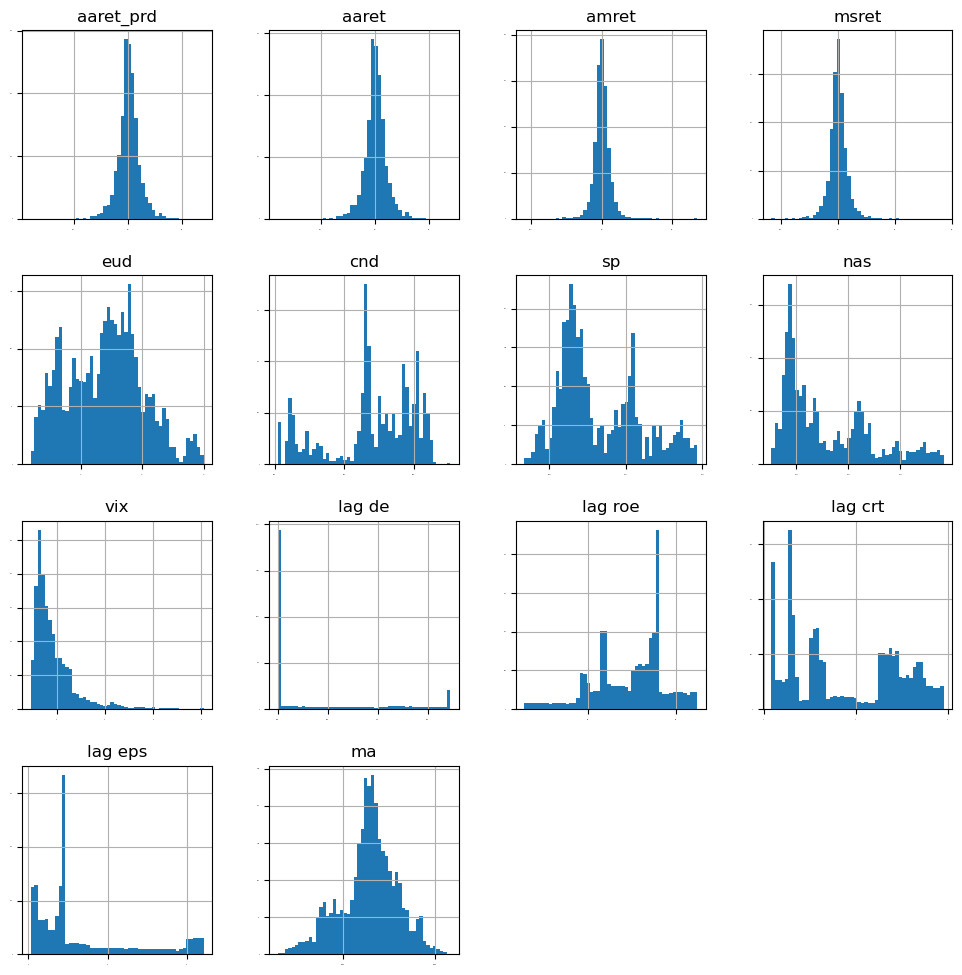

In [23]:
# look at the dist. of the data over the whole period
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
filename = '/Users/sunweilu/Desktop/EE 590/figures19/distribution of data over the whole period.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

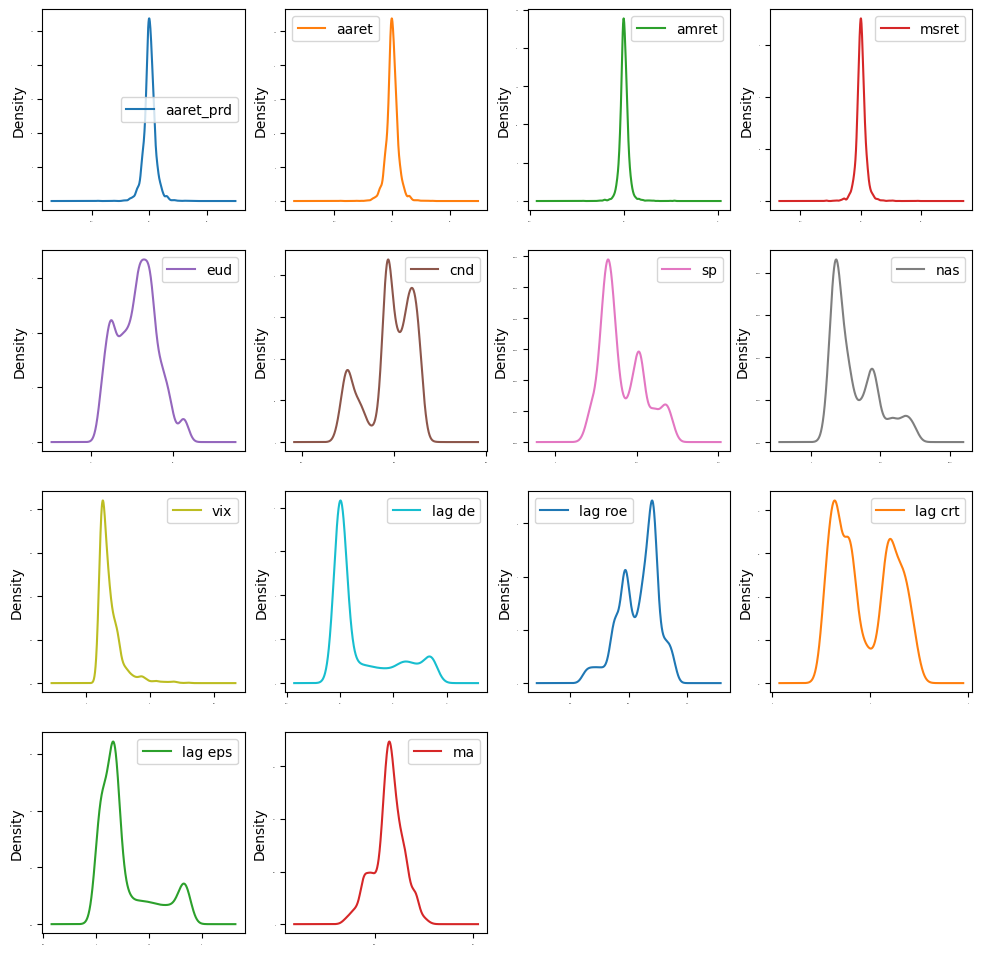

In [24]:
# show the density of all variables, but the sharex should be set to false (they have different scales)
dataset.plot(kind='density', subplots=True, sharex = False, layout=(4,4), legend=True, fontsize=1, figsize=(12,12))
filename = '/Users/sunweilu/Desktop/EE 590/figures19/density of all variables.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

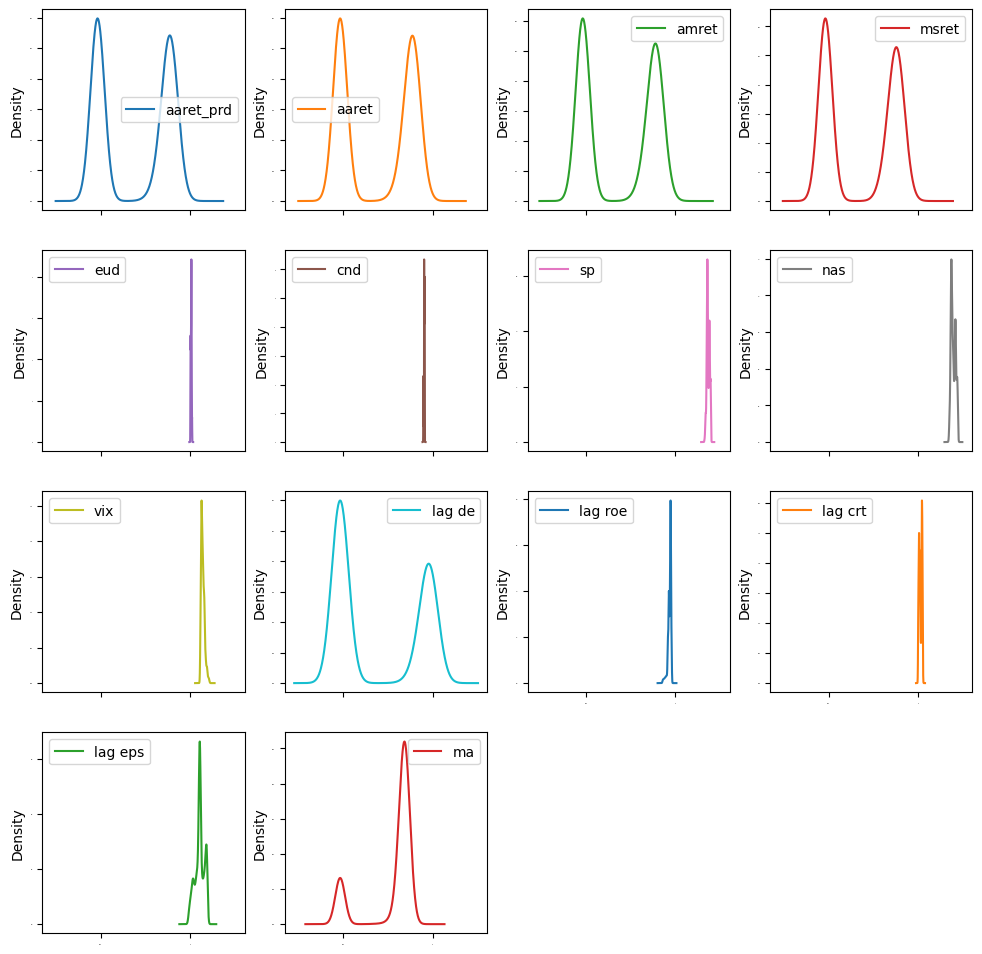

In [25]:
# transform all data to the logarithmic version and see their density
log_dataset = dataset.copy()

# Apply log transformation to all columns
# Replace 0 with a small positive value if necessary
log_dataset = log_dataset.apply(lambda x: np.log(x.clip(lower=1e-9)))

log_dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(12,12))
filename = '/Users/sunweilu/Desktop/EE 590/figures19/density of all log_variables.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

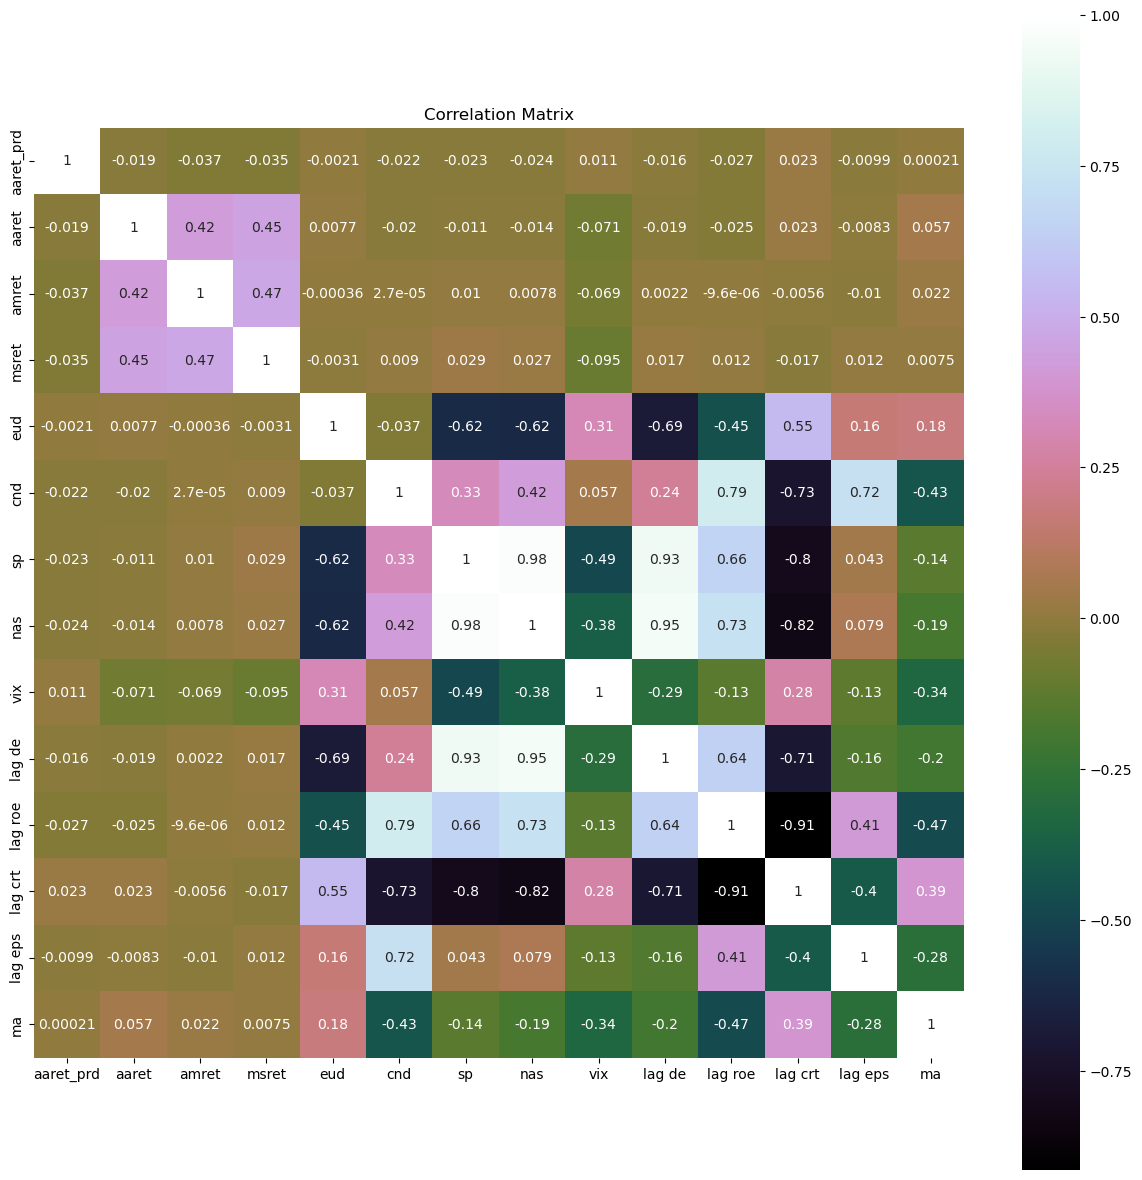

In [26]:
# In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix
# correlation matrix
datasetdrop = dataset.drop(columns=['aaret'])
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
filename = '/Users/sunweilu/Desktop/EE 590/figures19/correlation matrix.png'  # Dynamically create a filename
plt.savefig(filename)

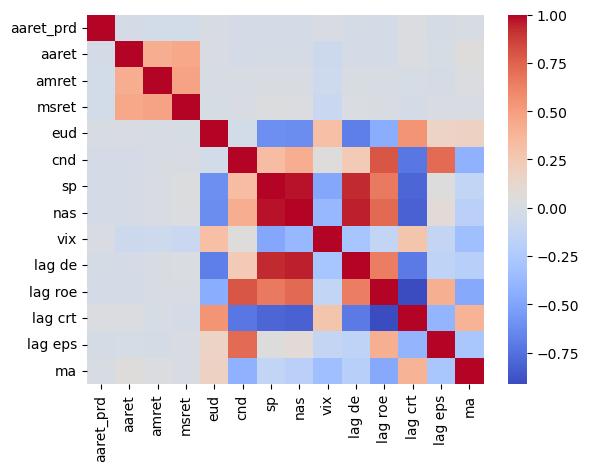

In [27]:
# seaborn - heatmap
sns.heatmap(correlation, cmap='coolwarm')
filename = '/Users/sunweilu/Desktop/EE 590/figures19/heatmap.png'  # Dynamically create a filename
plt.savefig(filename)

<Figure size 1500x1500 with 0 Axes>

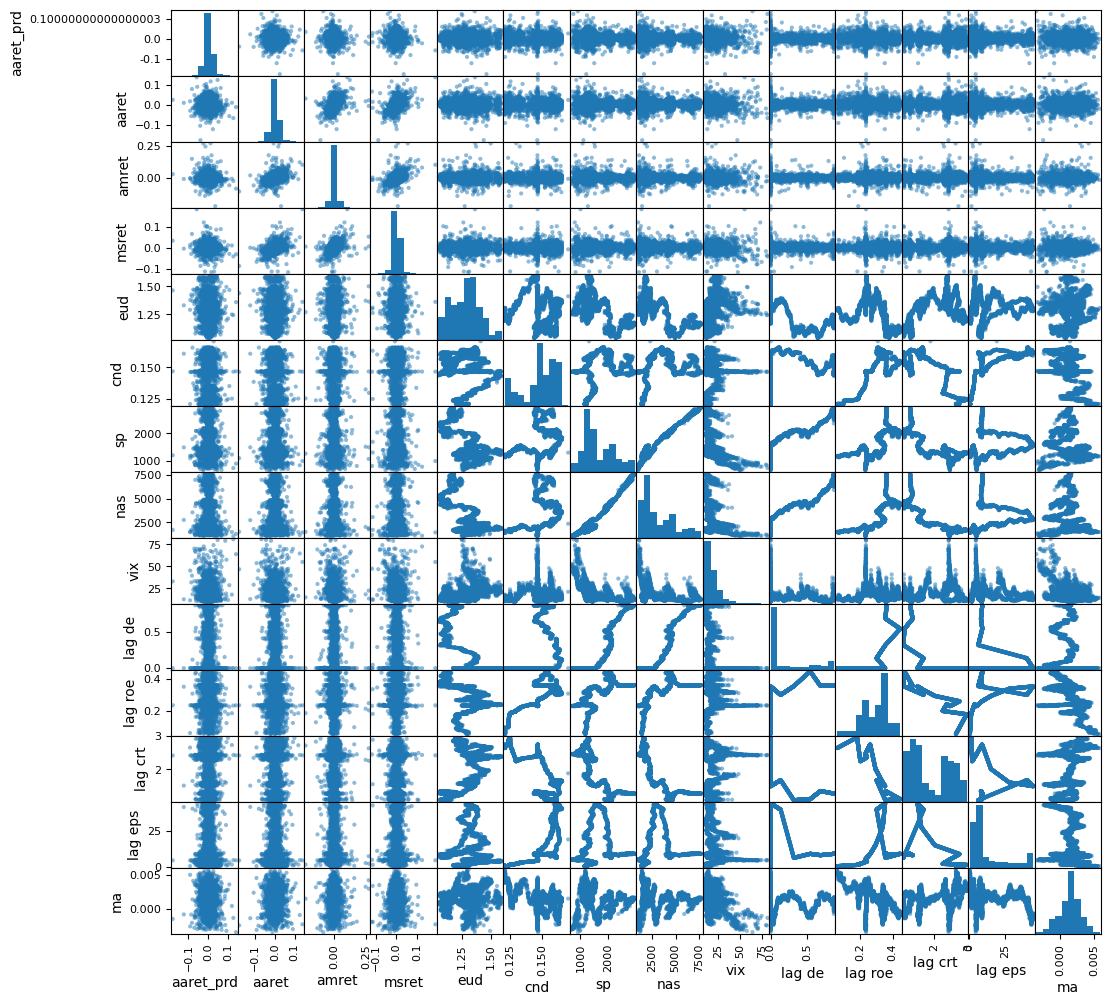

In [28]:
plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
filename = '/Users/sunweilu/Desktop/EE 590/figures19/scatter_matrix.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

Time Series Analysis

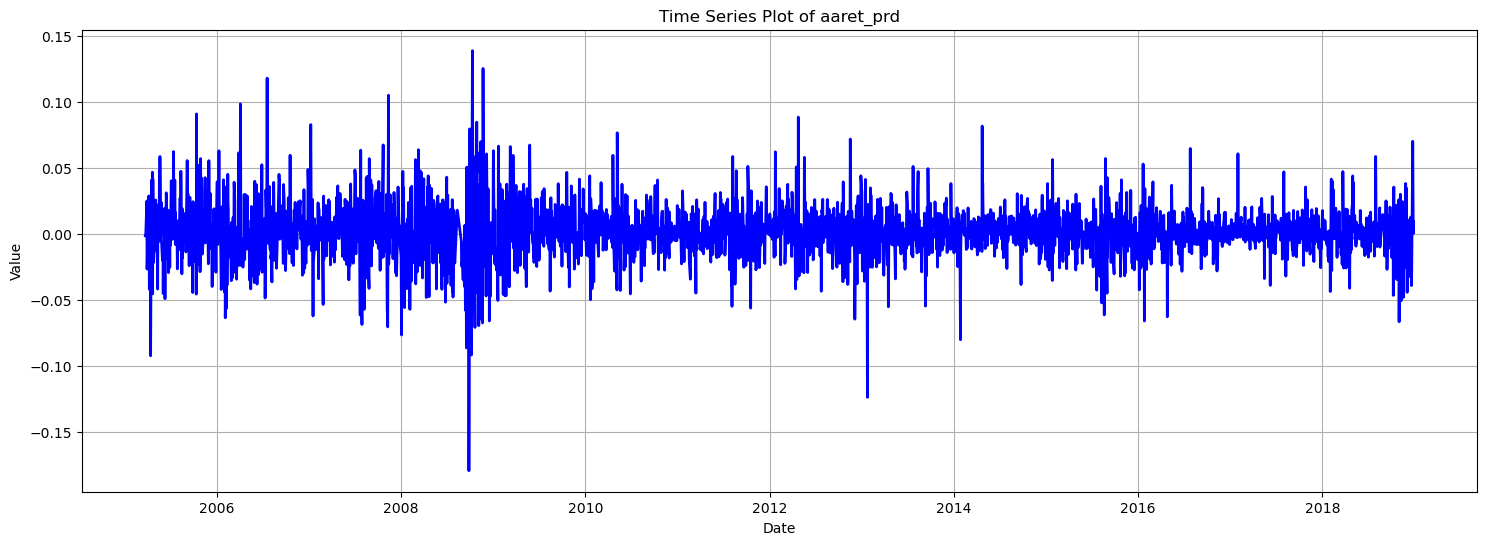

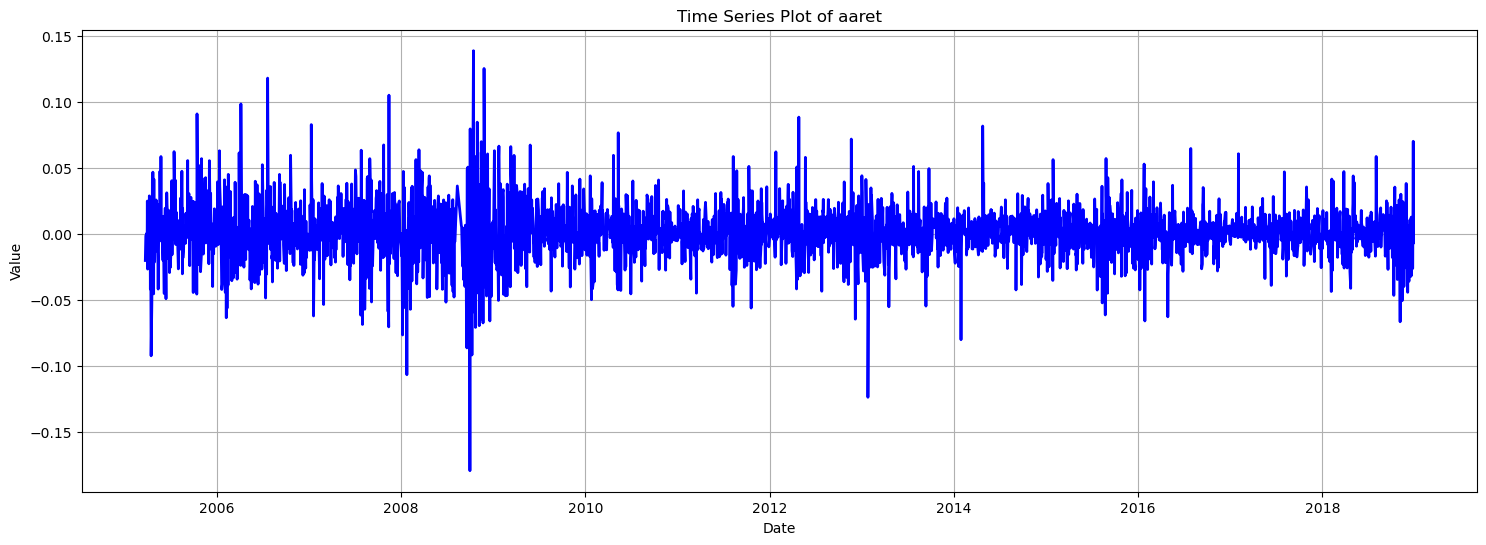

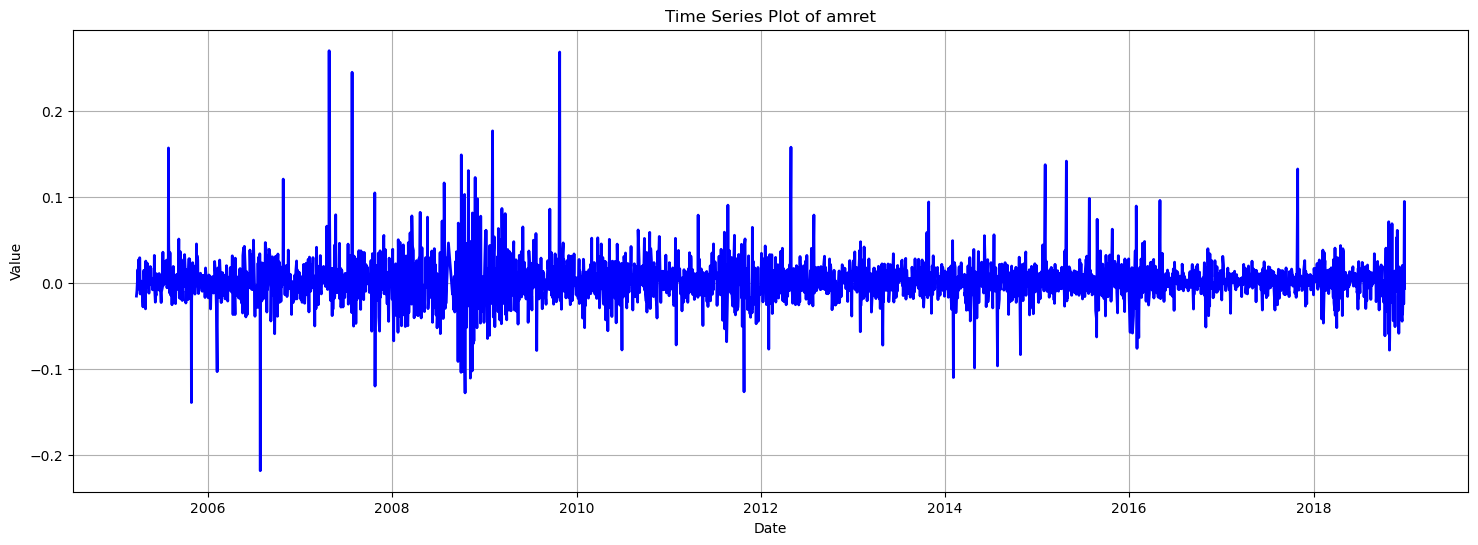

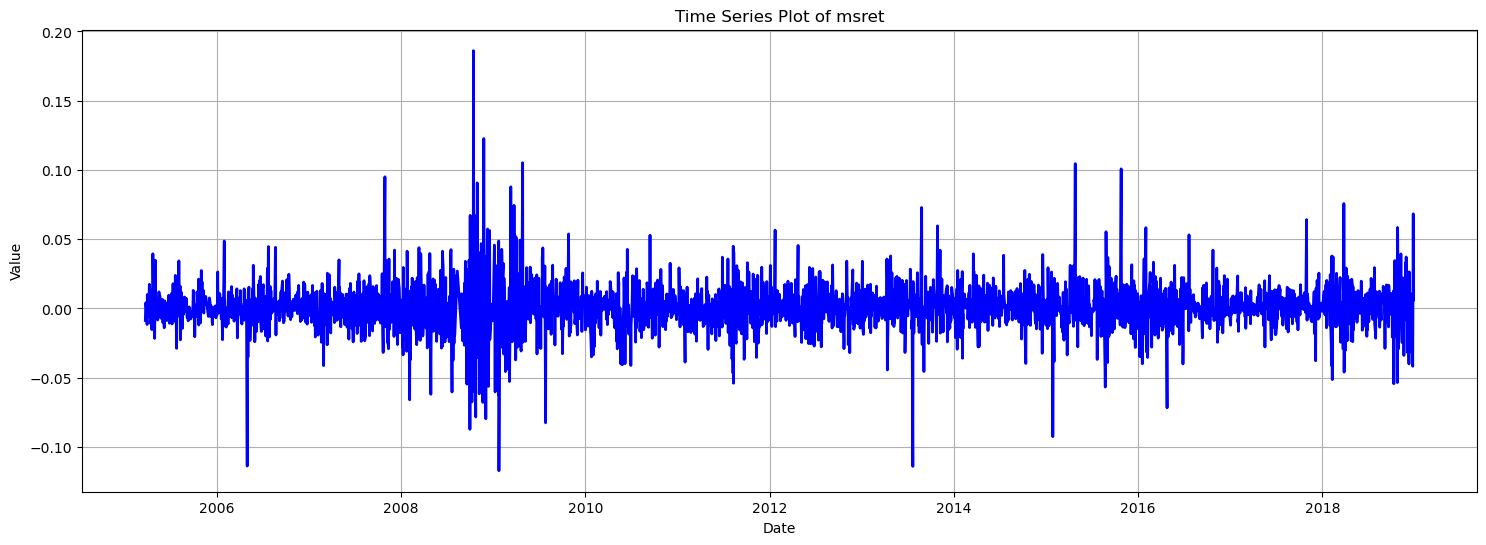

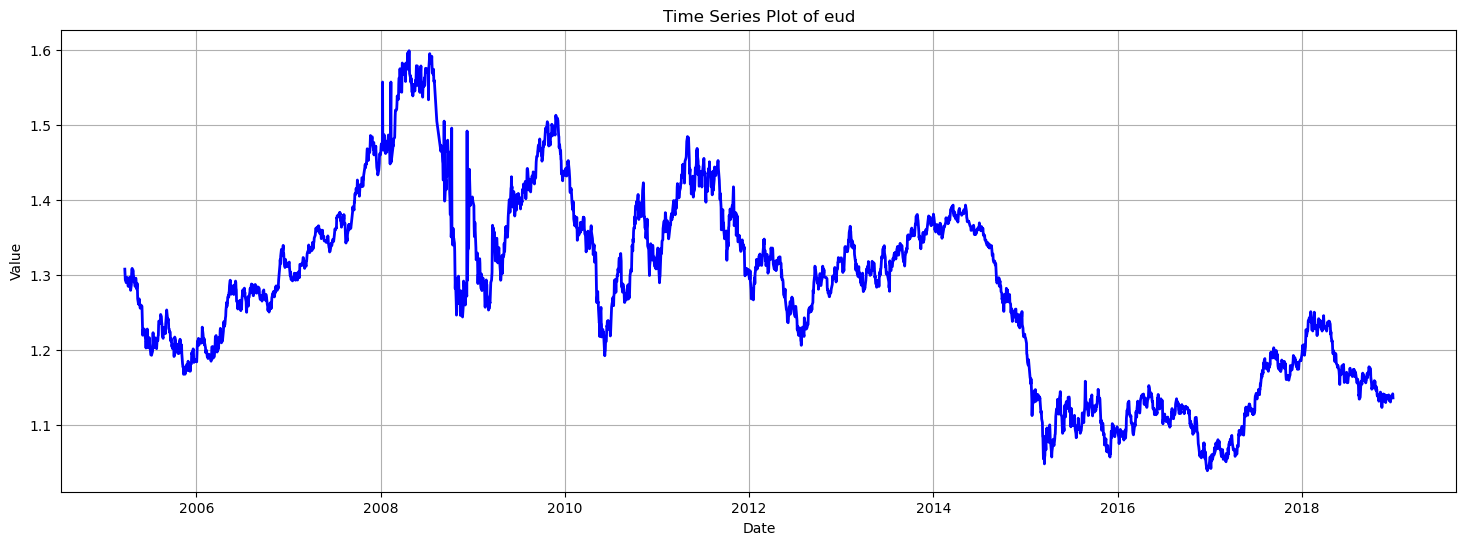

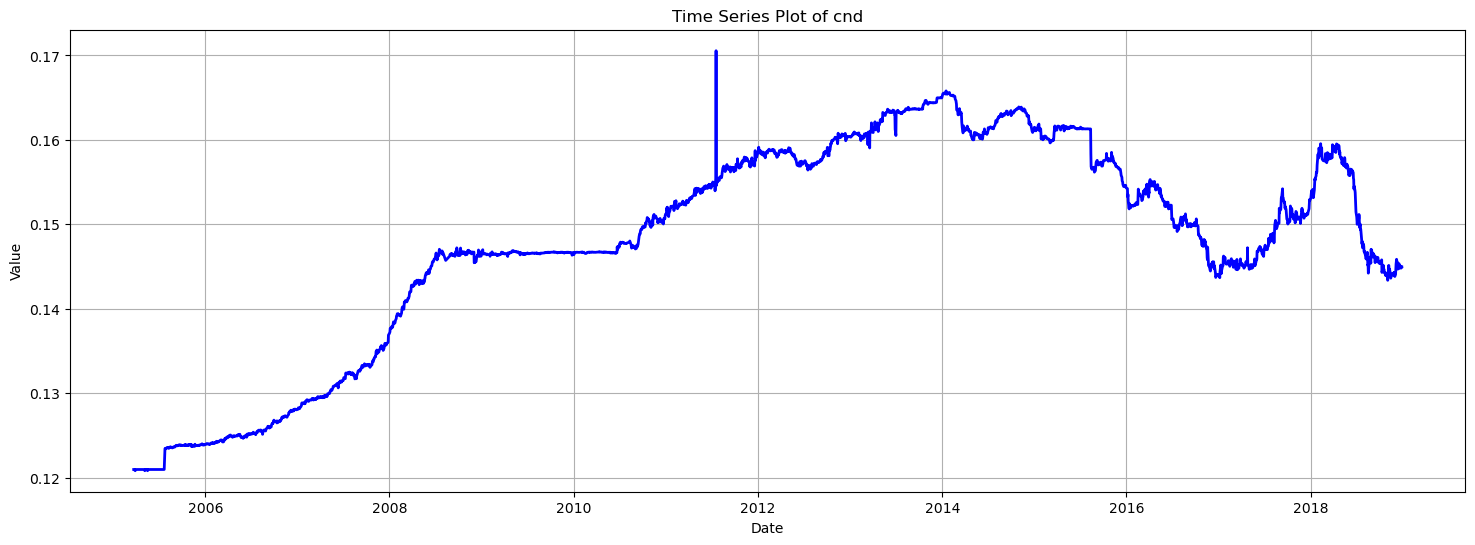

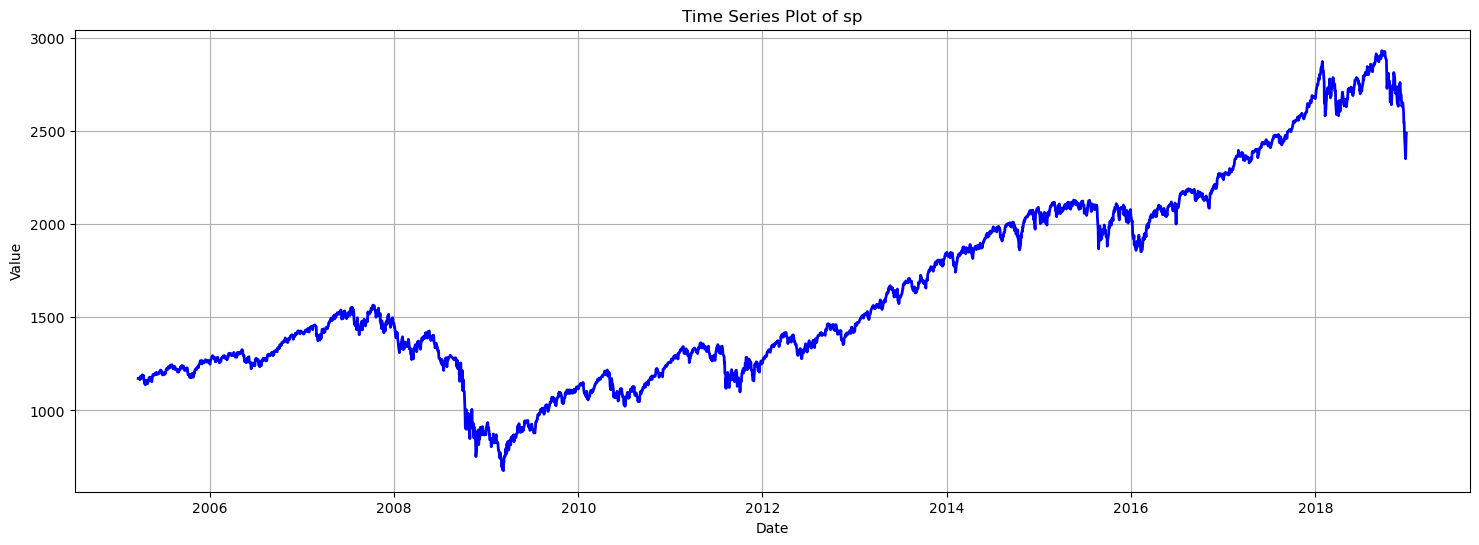

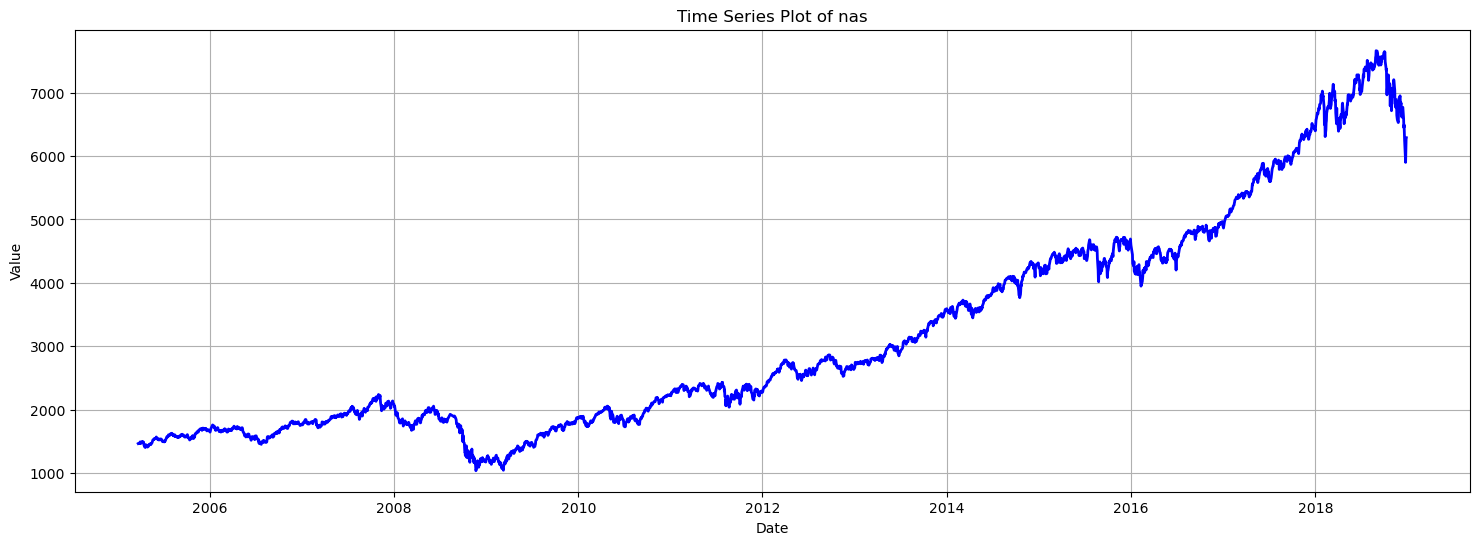

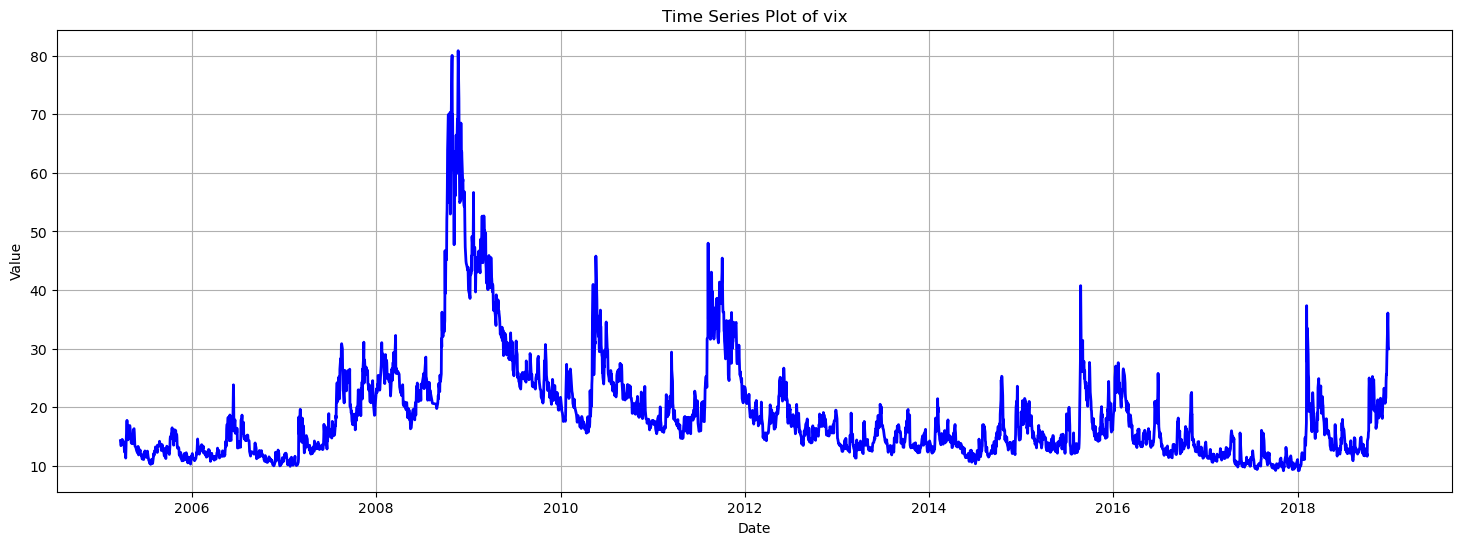

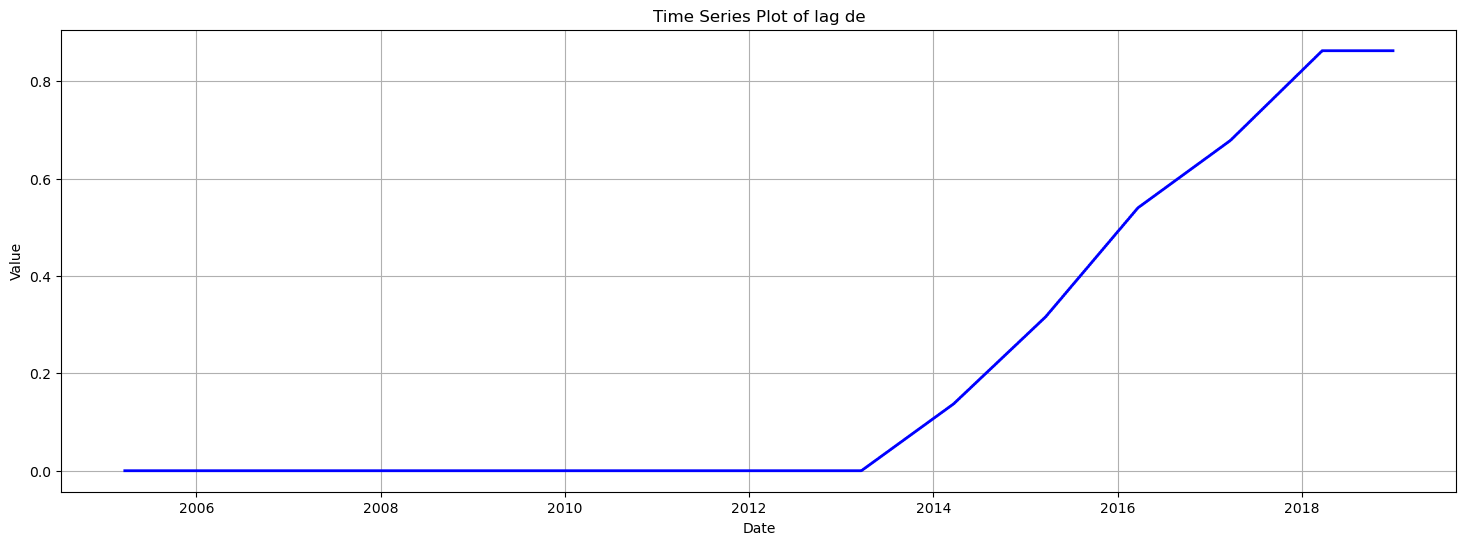

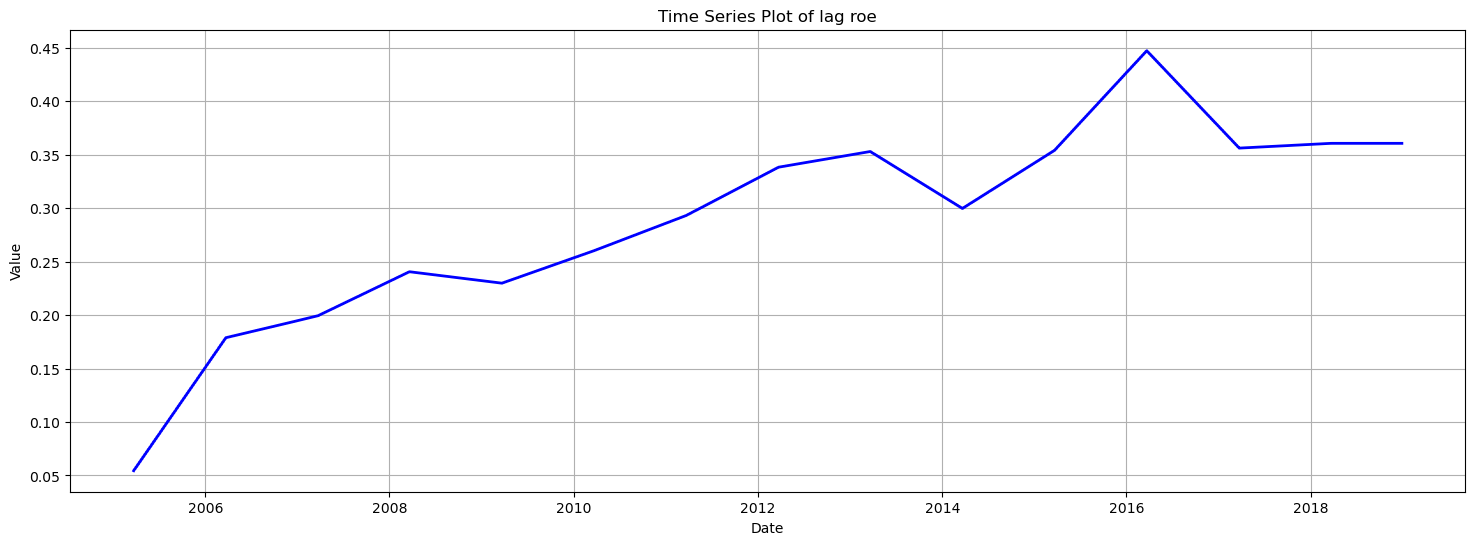

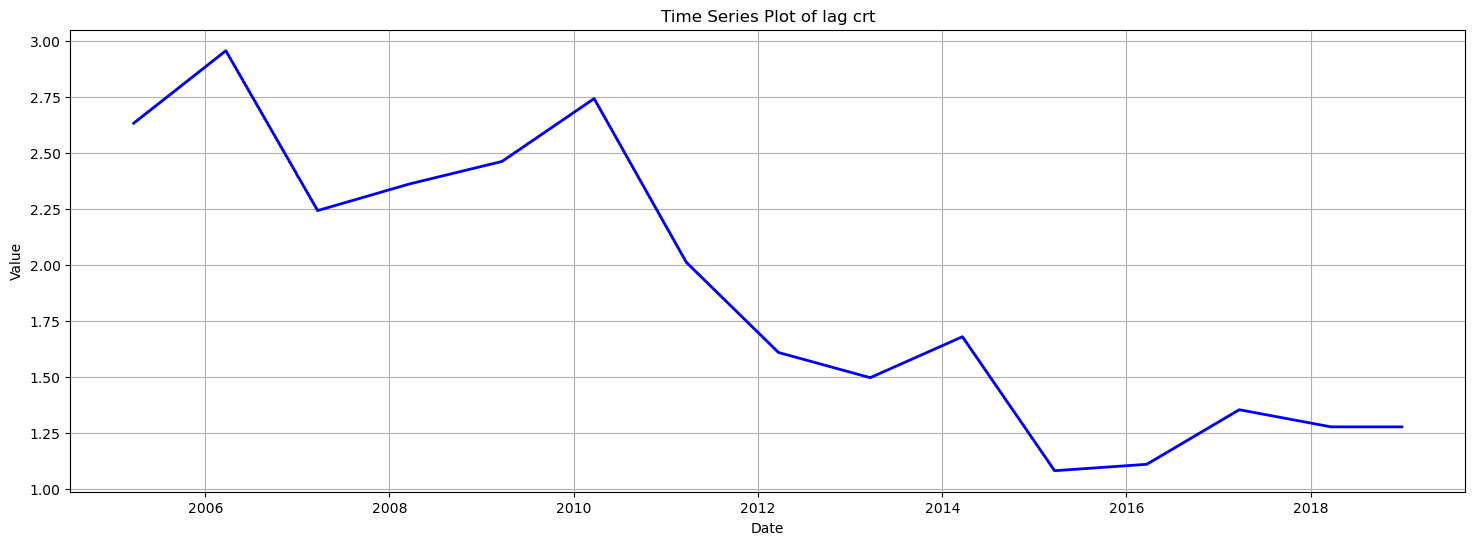

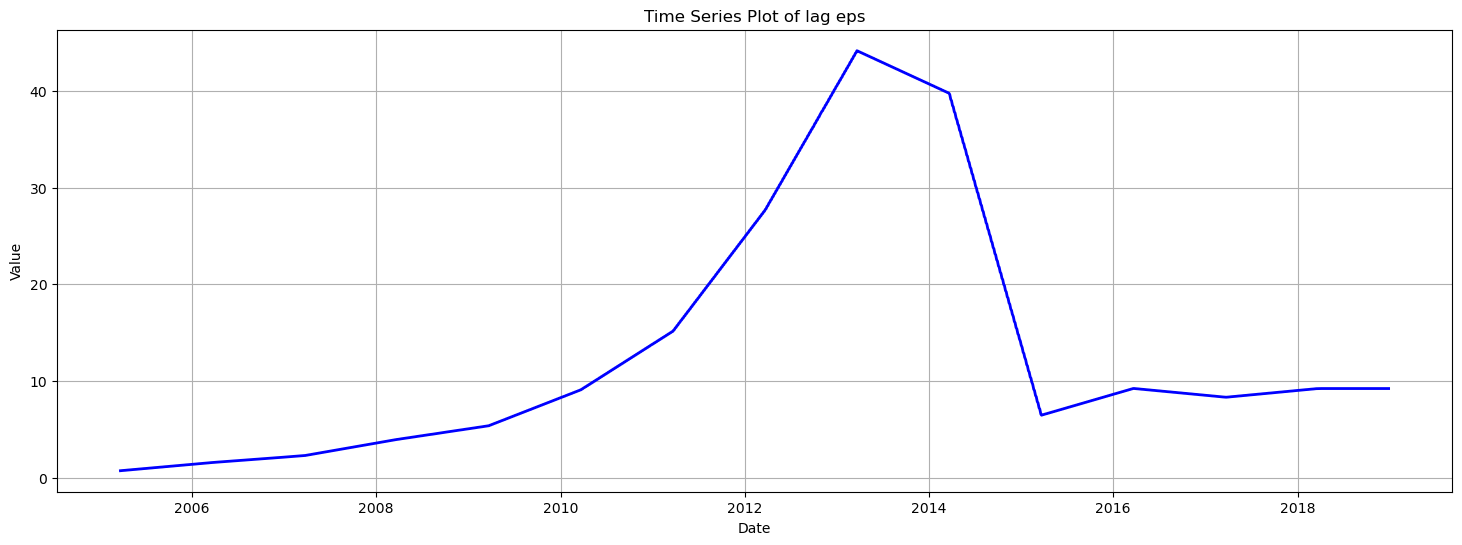

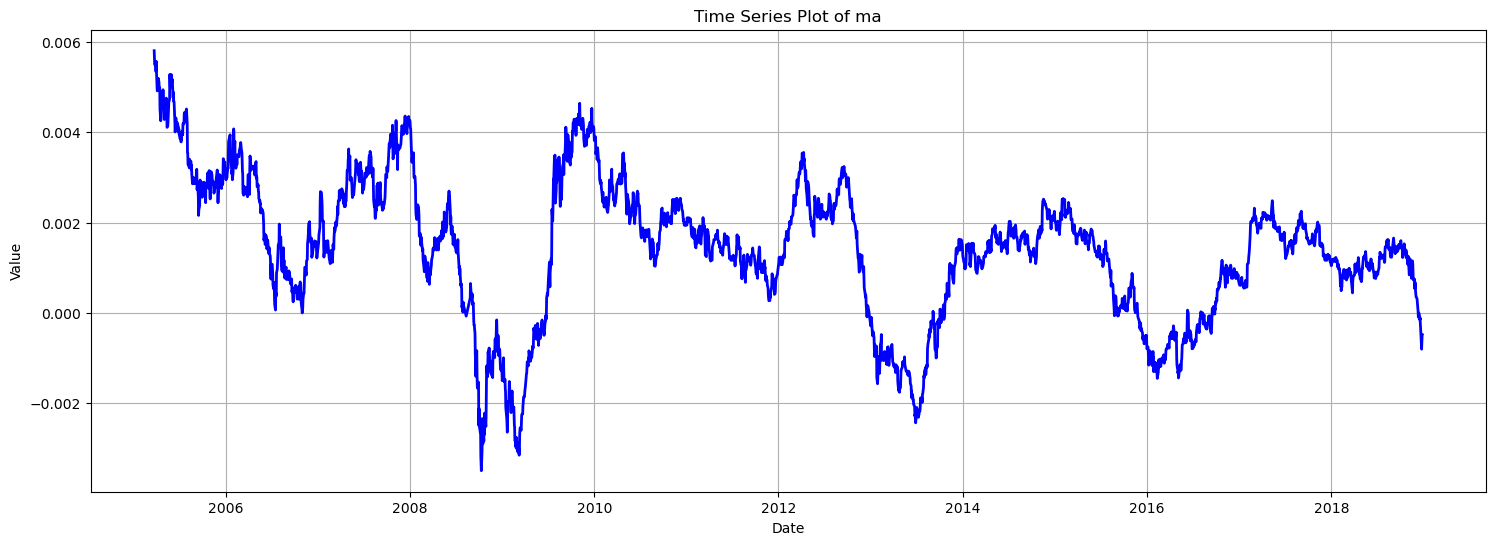

In [29]:
# plot the time series figure of various variables
for column in dataset:
    plt.figure(figsize=(18, 6))
    plt.plot(dataset.index, dataset[column], marker='', color='blue', linewidth=2)
    plt.title(f'Time Series Plot of {column}')  # Title changes dynamically with the column name
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    filename = f'/Users/sunweilu/Desktop/EE 590/figures19/Time Series Plot of {column}.png'  # Dynamically create a filename
    plt.savefig(filename)
    plt.show()



An Overview of important predictors

In [30]:
# use selectbest funtion to get a general view of importance of each predictor
# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, Y)

# Get scores and feature names
feature_scores = selector.scores_
features = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort features by score
sorted_features = features.sort_values(by='Score', ascending=False)

# Print sorted features
print(sorted_features)

    Feature     Score
1     amret  4.462110
2     msret  4.035538
9   lag roe  2.392112
6       nas  1.886788
10  lag crt  1.786614
5        sp  1.712748
4       cnd  1.624926
0     aaret  1.194283
8    lag de  0.841797
7       vix  0.384981
11  lag eps  0.321713
3       eud  0.014898
12       ma  0.000151


1. split the train/test set

In [31]:
# since we have a time series situation, we split the dataset manually and keep the sequential
validation_size = 0.2  # Proportion of data to be used as the test set

train_size = int(len(X) * (1 - validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)] 

In [32]:
X_train.describe()

,aaret,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps,ma
count,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000,2650.000000
mean,0.001281,0.001292,0.000491,1.313347,0.147624,1434.194720,2478.906104,19.894660,0.067908,0.273233,2.041771,14.596513,0.001519
std,0.021920,0.026556,0.017425,0.110753,0.013682,343.792098,990.372852,9.672565,0.137780,0.079846,0.566752,13.908680,0.001634
min,-0.179195,-0.218220,-0.117131,1.048163,0.120824,676.530029,1036.510010,9.890000,0.000000,0.054374,1.080113,0.710000,-0.003494
25%,-0.009326,-0.010760,-0.007685,1.254501,0.135812,1207.190033,1729.702515,13.520000,0.000000,0.229783,1.559669,3.497442,0.000700
50%,0.001067,0.000111,0.000082,1.317654,0.149701,1353.164978,2129.239991,16.964999,0.000000,0.278384,2.254995,8.338985,0.001652
75%,0.012542,0.013330,0.008419,1.376794,0.159919,1652.552490,3028.332459,22.987500,0.041945,0.335625,2.518178,24.019416,0.002622
max,0.139050,0.269497,0.186047,1.598798,0.170561,2129.199951,4719.049805,80.860001,0.545374,0.447355,2.956372,44.150000,0.005808


In [33]:
X_test.describe()

,aaret,amret,msret,eud,cnd,sp,nas,vix,lag de,lag roe,lag crt,lag eps,ma
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,0.000601,0.001479,0.001052,1.142970,0.149835,2472.213544,5906.181650,13.955264,0.739997,0.374031,1.275129,8.883444,0.000967
std,0.014439,0.017570,0.013916,0.050278,0.004502,259.259120,988.258229,4.085395,0.109829,0.024828,0.054536,0.298939,0.000844
min,-0.066331,-0.078197,-0.071710,1.039047,0.143375,2000.540039,4201.049805,9.140000,0.545902,0.356237,1.119011,8.310000,-0.001440
25%,-0.005611,-0.005931,-0.004779,1.110426,0.145560,2208.474976,4875.485108,11.280000,0.637640,0.359096,1.276063,8.627265,0.000643
50%,0.000431,0.001431,0.000868,1.140095,0.149788,2465.840088,5907.729980,12.810000,0.751654,0.360702,1.276063,8.926154,0.001119
75%,0.007735,0.009921,0.007461,1.177205,0.152740,2707.514893,6810.199951,15.460000,0.862981,0.383189,1.313040,9.210000,0.001570
max,0.070422,0.132164,0.075705,1.251001,0.159551,2930.750000,7660.180176,37.320000,0.862981,0.443529,1.352669,9.210000,0.002486


In [34]:
Y_train.describe()

count    2650.000000
mean        0.001291
std         0.021758
min        -0.179195
25%        -0.009349
50%         0.000978
75%         0.012528
max         0.139050
Name: aaret_prd, dtype: float64

In [35]:
Y_test.describe()

count    663.000000
mean       0.000743
std        0.014662
min       -0.066331
25%       -0.005564
50%        0.000755
75%        0.007837
max        0.070422
Name: aaret_prd, dtype: float64

set up for cross-validation

In [36]:
# set up for cross-validation for evaulating the performance of machine learning models
# Number of folds for cross-validation
num_folds = 10

# Setting the random seed for reproducibility
seed = 7

# Scoring metric for model evaluation
# Using negative mean squared error to align with scikit-learn's convention (higher is better)
# The final scores will be negated to interpret as mean squared errors
scoring_metric = 'neg_mean_squared_error'


2. define the models

In [37]:
models = [
    ('LR', LinearRegression()),
    ('LASSO', Lasso()),
    ('EN', ElasticNet()),
    ('SVR', SVR()),
    ('KNN', KNeighborsRegressor()),
    ('DTR', DecisionTreeRegressor()),
    ('RFR', RandomForestRegressor()),
    ('ETR', ExtraTreesRegressor()),
    ('GBR', GradientBoostingRegressor()),
    # ('MLP', MLPRegressor())
]

3. loop through each model and doing the evalution process (k-fold cross validation, training error, and test error)

In [38]:
# Variables for storing results
model_names = []
kfold_results = []
train_errors = []
test_errors = []

# Define number of folds for cross-validation
fold_num = 10
seed = 7
eval_metric = 'neg_mean_squared_error' # evaluation metric

# Model evaluation loop
for name, model in models:
    model_names.append(name)
    
    # Perform K-Fold Cross-Validation
    kfold = KFold(n_splits=fold_num, random_state=seed, shuffle=True)
    cv_scores = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=eval_metric)
    kfold_results.append(cv_scores)
    
    # Fit model and evaluate errors
    model.fit(X_train, Y_train)
    training_error = mean_squared_error(Y_train, model.predict(X_train))
    testing_error = mean_squared_error(Y_test, model.predict(X_test))
    train_errors.append(training_error)
    test_errors.append(testing_error)
    
    # Display results
    print(f"{name}: CV Mean MSE = {cv_scores.mean():.6f} (Std: {cv_scores.std():.6f}), Train MSE = {training_error:.6f}, Test MSE = {testing_error:.6f}")

LR: CV Mean MSE = 0.000479 (Std: 0.000080), Train MSE = 0.000472, Test MSE = 0.000234
LASSO: CV Mean MSE = 0.000474 (Std: 0.000078), Train MSE = 0.000473, Test MSE = 0.000215
EN: CV Mean MSE = 0.000474 (Std: 0.000078), Train MSE = 0.000473, Test MSE = 0.000215
SVR: CV Mean MSE = 0.000630 (Std: 0.000119), Train MSE = 0.000580, Test MSE = 0.000316
KNN: CV Mean MSE = 0.000564 (Std: 0.000072), Train MSE = 0.000374, Test MSE = 0.000299
DTR: CV Mean MSE = 0.000938 (Std: 0.000098), Train MSE = 0.000000, Test MSE = 0.001677
RFR: CV Mean MSE = 0.000505 (Std: 0.000074), Train MSE = 0.000073, Test MSE = 0.000438
ETR: CV Mean MSE = 0.000535 (Std: 0.000089), Train MSE = 0.000000, Test MSE = 0.000319
GBR: CV Mean MSE = 0.000496 (Std: 0.000078), Train MSE = 0.000354, Test MSE = 0.000541


4. look at the kfold results and compare (plotting)

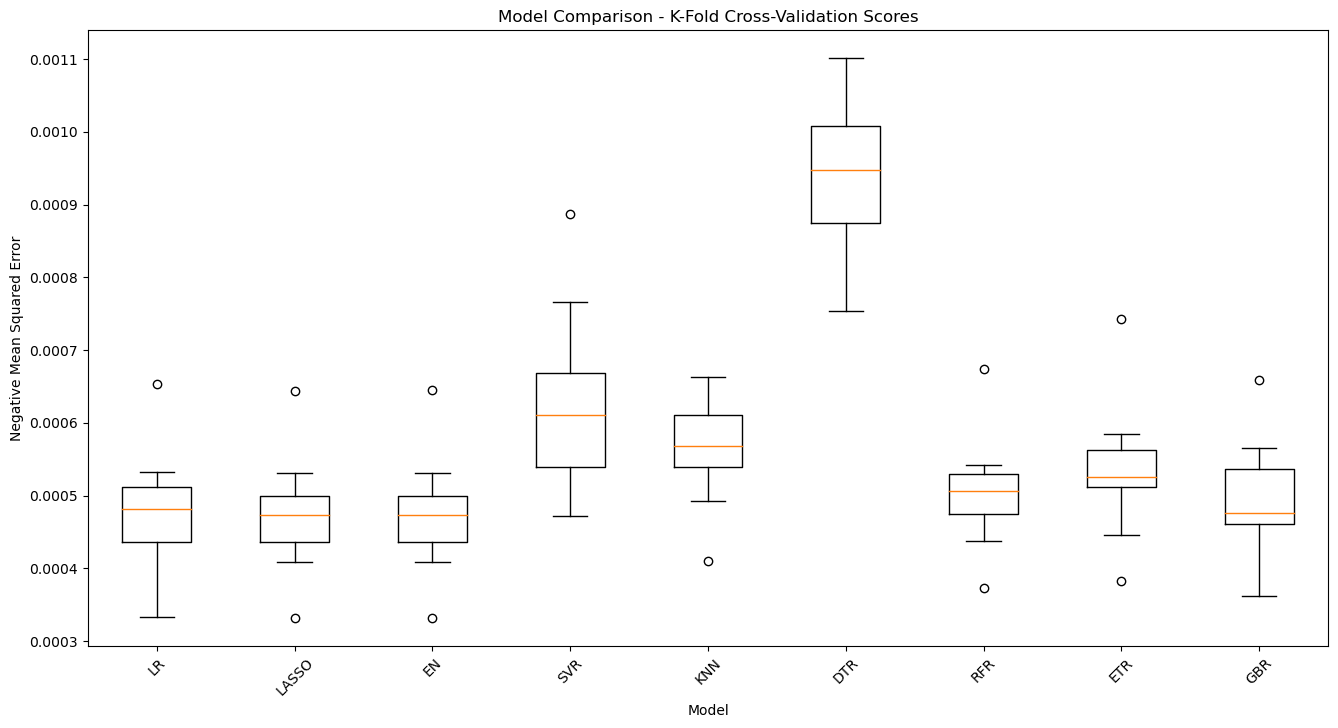

In [39]:
# Assuming 'kfold_results' contains the CV scores and 'model_names' contains the model names
fig, ax = plt.subplots(figsize=(16, 8))

# Create the boxplot
ax.boxplot(kfold_results, labels=model_names)

# Add labels and title
ax.set_title('Model Comparison - K-Fold Cross-Validation Scores')
ax.set_xlabel('Model')
ax.set_ylabel('Negative Mean Squared Error')

# Show the plot
plt.xticks(rotation=45)  # Rotates X-Axis Ticks by 45-degrees for better readability
filename = '/Users/sunweilu/Desktop/EE 590/figures19/kfold_1.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()


5. plot the train and test error for each model

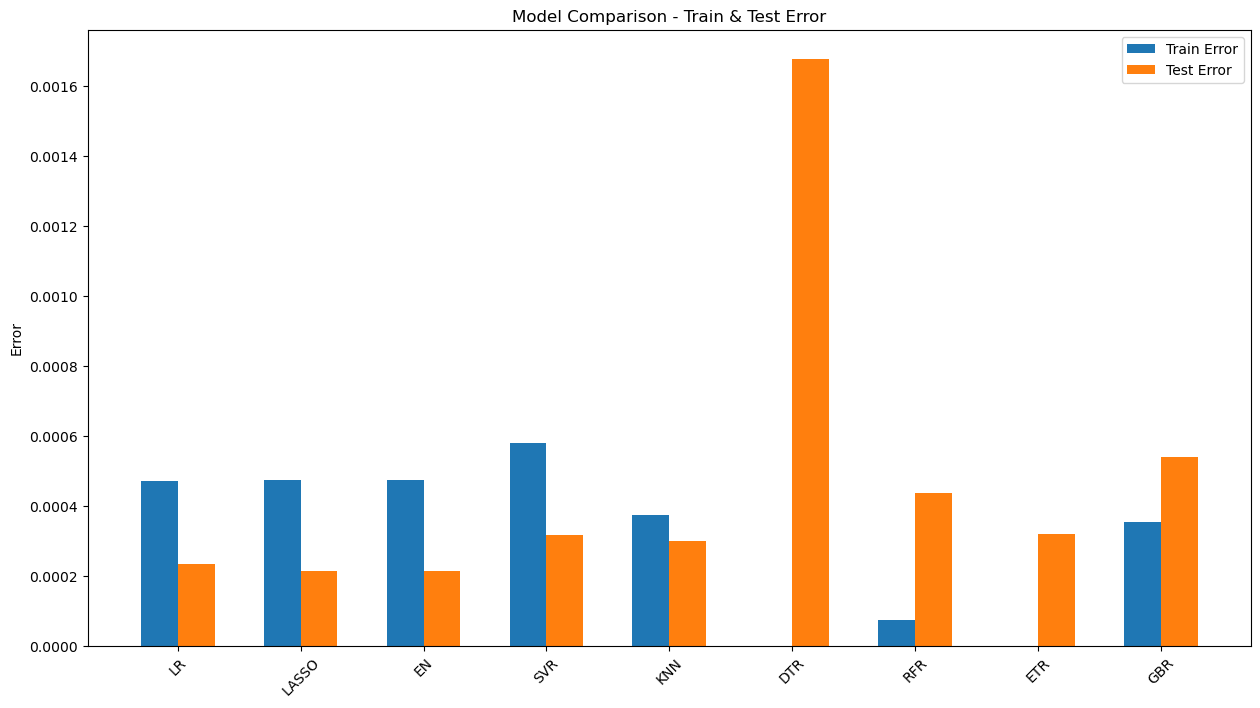

In [40]:
# Set up the figure
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Model Comparison - Train & Test Error')

# Set up the bar plot positions
ind = np.arange(len(model_names))  # x locations for the groups
width = 0.3  # width of the bars

# Create the bars for training and testing errors
ax.bar(ind - width/2, train_errors, width=width, label='Train Error')
ax.bar(ind + width/2, test_errors, width=width, label='Test Error')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Error')
ax.set_xticks(ind)
ax.set_xticklabels(model_names)
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate X-Axis Ticks for better readability
filename = '/Users/sunweilu/Desktop/EE 590/figures19/train_test_error_2.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

Time Series Models - ARIMA

In [41]:
# To use a regular ARIMA model for forecasting, which is typically applied to univariate time series data, 
# It only needs Y_train and Y_test (the target variable) for training and testing the model.

# Replace p, d, q with chosen parameters
p, d, q = 1, 1, 1

# Build and fit the ARIMA model
model = ARIMA(Y_train, order=(p, d, q))
model_fit = model.fit()

In [42]:
# in-sample predictions (train set)
train_predictions = model_fit.predict(start=Y_train.index[0], end=Y_train.index[-1])

# Forecast on the test dataset
predictions = model_fit.forecast(steps=len(Y_test))

# Calculate and print the mean squared error
train_error_arima = mean_squared_error(Y_train, train_predictions)
test_error_arima = mean_squared_error(Y_test, predictions)
print(f'Train Mean Squared Error: {train_error_arima}')
print(f'Test Mean Squared Error: {test_error_arima}')

# # Optionally, you can compare the predictions with actual values
# comparison_df = pd.DataFrame({'actual': Y_test, 'predicted': predictions})
# print(comparison_df)


Train Mean Squared Error: 0.00047510023948135424
Test Mean Squared Error: 0.0002148051932838938


In [43]:
# append the results of ARIMA model to the previous results
test_errors.append(test_error_arima)
# test_results.append(error_Test_LSTM)

train_errors.append(test_error_arima)
# train_errors.append(test_error_lstm)

model_names.append("ARIMA")
# model_names.append("LSTM")

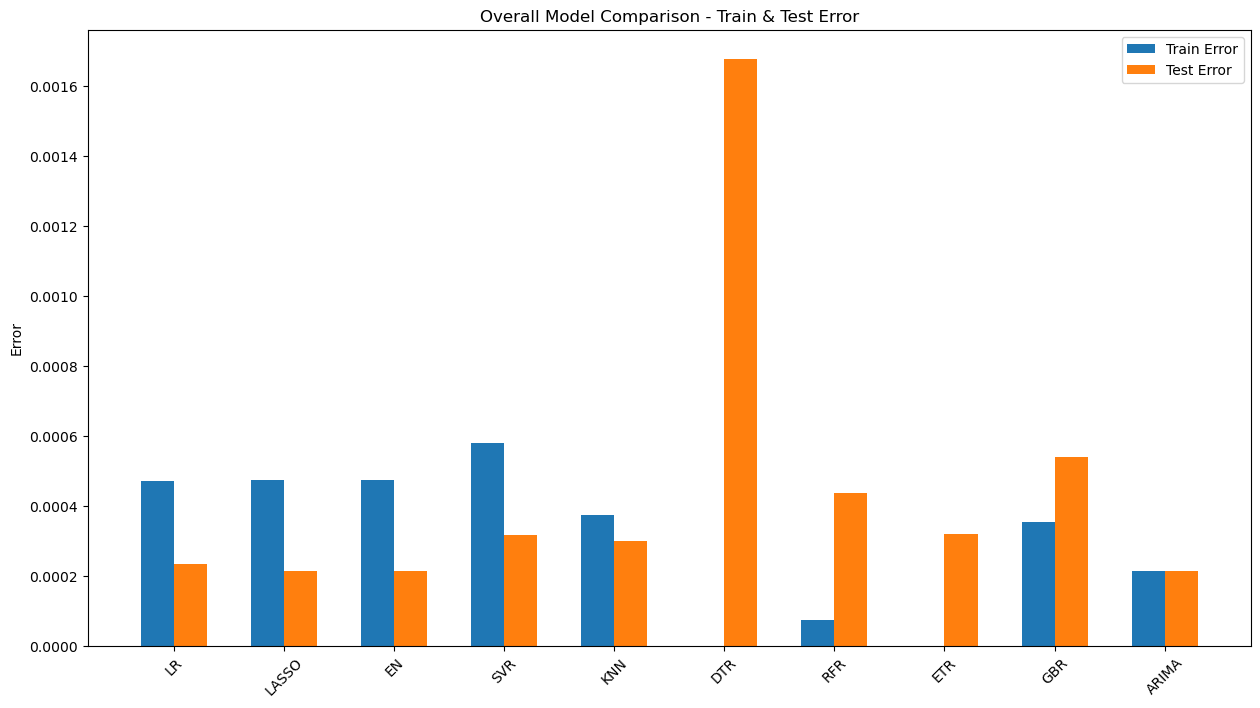

In [44]:
# run the comparison plot again to combine all error results together
# Set up the figure
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_title('Overall Model Comparison - Train & Test Error')

# Set up the bar plot positions
ind = np.arange(len(model_names))  # x locations for the groups
width = 0.3  # width of the bars

# Create the bars for training and testing errors
ax.bar(ind - width/2, train_errors, width=width, label='Train Error')
ax.bar(ind + width/2, test_errors, width=width, label='Test Error')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Error')
ax.set_xticks(ind)
ax.set_xticklabels(model_names)
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate X-Axis Ticks for better readability
filename = '/Users/sunweilu/Desktop/EE 590/figures19/train_test_error_2.png'  # Dynamically create a filename
plt.savefig(filename)
plt.show()

Model Tuning and Grid Research

In [45]:
# 1st try to tune the model
import itertools

# Define the p, d, and q ranges to try
p = range(0, 5)
d = range(0, 2)
q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Search for the best ARIMA hyperparameters
best_aic = float('inf')
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(Y_train, order=param)
        temp_model_fit = temp_model.fit()
        
        if temp_model_fit.aic < best_aic:
            best_aic = temp_model_fit.aic
            best_pdq = param
            best_model = temp_model_fit
    except:
        continue

print(f'Best ARIMA{best_pdq} AIC: {best_aic}')

Best ARIMA(0, 0, 0) AIC: -12763.828232796262


In [46]:
# 2nd try to find the best model parameter
import itertools
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Define the p, d, and q ranges to try
p = range(0, 5)
d = range(0, 2)
q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Set up cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Adjust splits as needed

# Search for the best ARIMA hyperparameters
best_score, best_cfg = float("inf"), None

for param in pdq:
    try:
        temp_score = 0
        for train_index, test_index in tscv.split(Y_train):
            temp_train, temp_test = Y_train[train_index], Y_train[test_index]
            temp_model = ARIMA(temp_train, order=param)
            temp_model_fit = temp_model.fit()
            temp_predictions = temp_model_fit.forecast(steps=len(temp_test))
            temp_score += mean_squared_error(temp_test, temp_predictions)

        # Average the MSE across folds
        average_score = temp_score / tscv.n_splits

        # Update the best parameters
        if average_score < best_score:
            best_score, best_cfg = average_score, param
    except:
        continue

print(f'Best ARIMA{best_cfg} MSE: {best_score}')

Best ARIMA(2, 0, 1) MSE: 0.0004365559828281733


In [47]:
## 3rd try to tune the model - this is ok
import itertools
import warnings


# Define the p, d, and q ranges to try
p = range(0, 4)  # Example range for p
d = range(0, 3)  # Example range for d
q = range(0, 4)  # Example range for q

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Track the best parameters and lowest RMSE
best_params = None
lowest_rmse = float('inf')

# Use a for loop to iterate over all possible combinations of parameters
for param in pdq:
    try:
        # Ignore the convergence warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            
            # Fit ARIMA model
            model = ARIMA(Y_train, order=param)
            model_fit = model.fit()
            
            # Forecast
            predictions = model_fit.forecast(steps=len(Y_test))
            
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(Y_test, predictions))
            print(f'ARIMA{param} - RMSE: {rmse:.4f}')
            
            # Check if this RMSE is lower than the previous ones
            if rmse < lowest_rmse:
                best_params = param
                lowest_rmse = rmse
                
    except Exception as e:
        continue  # If the parameter combination is not valid, move on to the next one

print(f'The best model is ARIMA{best_params} with RMSE of {lowest_rmse:.4f}')


ARIMA(0, 0, 0) - RMSE: 0.0147
ARIMA(0, 0, 1) - RMSE: 0.0147
ARIMA(0, 0, 2) - RMSE: 0.0147
ARIMA(0, 0, 3) - RMSE: 0.0147
ARIMA(0, 1, 0) - RMSE: 0.0176
ARIMA(0, 1, 1) - RMSE: 0.0147
ARIMA(0, 1, 2) - RMSE: 0.0147
ARIMA(0, 1, 3) - RMSE: 0.0147
ARIMA(0, 2, 0) - RMSE: 8.5399
ARIMA(0, 2, 1) - RMSE: 0.0189
ARIMA(0, 2, 2) - RMSE: 0.0147
ARIMA(0, 2, 3) - RMSE: 0.0180
ARIMA(1, 0, 0) - RMSE: 0.0147
ARIMA(1, 0, 1) - RMSE: 0.0147
ARIMA(1, 0, 2) - RMSE: 0.0147
ARIMA(1, 0, 3) - RMSE: 0.0147
ARIMA(1, 1, 0) - RMSE: 0.0148
ARIMA(1, 1, 1) - RMSE: 0.0147
ARIMA(1, 1, 2) - RMSE: 0.0147
ARIMA(1, 1, 3) - RMSE: 0.0147
ARIMA(1, 2, 0) - RMSE: 1.8070
ARIMA(1, 2, 1) - RMSE: 0.0150
ARIMA(1, 2, 2) - RMSE: 0.0148
ARIMA(1, 2, 3) - RMSE: 0.0146
ARIMA(2, 0, 0) - RMSE: 0.0147
ARIMA(2, 0, 1) - RMSE: 0.0147
ARIMA(2, 0, 2) - RMSE: 0.0147
ARIMA(2, 0, 3) - RMSE: 0.0147
ARIMA(2, 1, 0) - RMSE: 0.0148
ARIMA(2, 1, 1) - RMSE: 0.0147
ARIMA(2, 1, 2) - RMSE: 0.0147
ARIMA(2, 1, 3) - RMSE: 0.0147
ARIMA(2, 2, 0) - RMSE: 0.1746
ARIMA(2, 2

Model Evaluation

In [48]:
# Fit the best ARIMA model
best_model = ARIMA(Y_train, order=best_params)
model_fit = best_model.fit()

# Forecast and evaluate
predictions_tuned = model_fit.forecast(steps=len(Y_test))

# in-sample predictions (train set)
train_preditions_tuned = model_fit.predict(start=Y_train.index[0], end=Y_train.index[-1])

train_error_tuned = mean_squared_error(Y_train, train_preditions_tuned)
test_error_tuned = mean_squared_error(Y_test, predictions_tuned)

print(f'Train Mean Squared Error: {train_error_tuned}')
print(f'Test Mean Squared Error: {test_error_tuned}')

Train Mean Squared Error: 0.00048138609565268395
Test Mean Squared Error: 0.0002144882798143505


In [49]:
# Train Mean Squared Error: 0.00047510023948135424
# Test Mean Squared Error: 0.0002148051932838938

Save the Tuned Model

In [50]:
import pickle

# save the tuned ARIMA to a file
with open('arima_model.pkl', 'wb') as pkl:
    pickle.dump(model_fit, pkl)

In [51]:
# next time load the model from the file ready to use
with open('arima_model.pkl', 'rb') as pkl:
    loaded_model = pickle.load(pkl)